In [1]:
from PRAN import PRAN

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
from torch import nn, optim
from torch.autograd.variable import Variable
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/hepatitis.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85.000000,18.0,4.0,61.852273,1
1,0,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135.000000,42.0,3.5,61.852273,1
2,0,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96.000000,32.0,4.0,61.852273,1
3,0,31,1,2,1,2,2,2,2,2,2,2,2,2,0.7,46.000000,52.0,4.0,80.000000,1
4,0,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105.325397,200.0,4.0,61.852273,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.6,105.325397,242.0,3.3,50.000000,2
151,0,44,1,2,2,1,2,2,2,1,2,2,2,2,0.9,126.000000,142.0,4.3,61.852273,2
152,0,61,1,1,2,1,1,2,1,1,2,1,2,2,0.8,75.000000,20.0,4.1,61.852273,2
153,0,53,2,1,2,1,2,2,2,2,1,1,2,1,1.5,81.000000,19.0,4.1,48.000000,2


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis = 1), df['Class'], test_size=0.1, random_state=1, stratify=df['Class'])
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# X_val = sc.transform(X_val)

--Initial Recall Booster Training Complete--
Epoch #0 - 
 Precision: 0.6666666666666666 
 Recall: 0.4 

Epoch #1 - 
 Precision: 0.7142857142857143 
 Recall: 1.0 

Epoch #2 - 
 Precision: 0.8 
 Recall: 0.8 

Epoch #3 - 
 Precision: 0.8333333333333334 
 Recall: 0.8333333333333334 

Epoch #4 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #5 - 
 Precision: 0.5 
 Recall: 0.75 

Epoch #6 - 
 Precision: 0.6666666666666666 
 Recall: 0.8 

Epoch #7 - 
 Precision: 0.3333333333333333 
 Recall: 0.2 

Epoch #8 - 
 Precision: 0.5 
 Recall: 0.2 

Epoch #9 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #10 - 
 Precision: 0.6 
 Recall: 0.75 

Epoch #11 - 
 Precision: 0.6666666666666666 
 Recall: 1.0 

Epoch #12 - 
 Precision: 0.5714285714285714 
 Recall: 1.0 

Epoch #13 - 
 Precision: 0.5714285714285714 
 Recall: 1.0 

Epoch #14 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #15 - 
 Precision: 0.8 
 Recall: 1.0 

Epoch #16 - 
 Precision: 0.6 
 Recall: 0.6 

Epoch #17 - 
 Precision: 0.5 
 Recall: 0.5 

Epoch #18 - 
 Prec

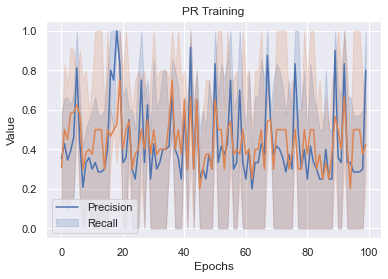

Precision Score:  0.21428571428571427
Recall Score:  1.0


In [10]:
pran = PRAN(shape = X_train.shape[1])
pran.fit(X_train = X_train, y_train = y_train, batch_rb_samples = 4, epochs = 100, batch_size = 8)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

r.
  _warn_prf(average, modifier, msg_start, len(result))
Epoch #53 - 
 Precision: 1.0 
 Recall: 0.25 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` 

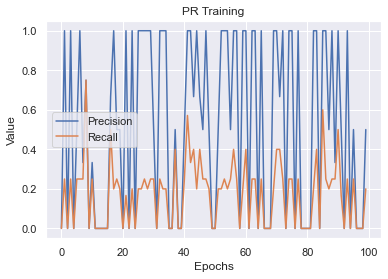

Precision Score:  0.5
Recall Score:  0.6666666666666666


In [4]:
pran = PRAN(shape = X_train.shape[1])
pran.fit(X_train = X_train, y_train = y_train, batch_rb_samples = 4, epochs = 100, batch_size = 8)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))

--Initial Recall Booster Training Complete--
Epoch #0 - 
 Precision: 1.0 
 Recall: 0.42857142857142855 

Epoch #1 - 
 Precision: 1.0 
 Recall: 0.75 

Epoch #2 - 
 Precision: 0.5 
 Recall: 0.3333333333333333 

Epoch #3 - 
 Precision: 0.75 
 Recall: 0.5 

Epoch #4 - 
 Precision: 0.25 
 Recall: 0.16666666666666666 

Epoch #5 - 
 Precision: 1.0 
 Recall: 0.8571428571428571 

Epoch #6 - 
 Precision: 0.7142857142857143 
 Recall: 0.7142857142857143 

Epoch #7 - 
 Precision: 0.6666666666666666 
 Recall: 0.2857142857142857 

Epoch #8 - 
 Precision: 0.75 
 Recall: 0.5 

Epoch #9 - 
 Precision: 1.0 
 Recall: 0.6666666666666666 

Epoch #10 - 
 Precision: 1.0 
 Recall: 0.3333333333333333 

Epoch #11 - 
 Precision: 0.5 
 Recall: 0.5 

Epoch #12 - 
 Precision: 1.0 
 Recall: 0.5 

Epoch #13 - 
 Precision: 0.6 
 Recall: 0.5 

Epoch #14 - 
 Precision: 0.5 
 Recall: 0.5 

Epoch #15 - 
 Precision: 0.5 
 Recall: 0.3333333333333333 

Epoch #16 - 
 Precision: 0.8333333333333334 
 Recall: 0.8333333333333334 


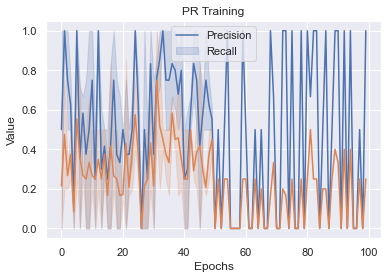

Precision Score:  0.2
Recall Score:  0.6666666666666666


In [5]:
pran = PRAN(shape = X_train.shape[1])
pran.fit(X_train = X_train, y_train = y_train, batch_rb_samples = 4, epochs = 50, batch_size = 8, lr_pb = 1e-4, lr_rb = 1e-4, l2_pb = 0, l2_rb = 0)
pran.plotPR()
y_pred = pran.predict(X_test)
y_pred = (y_pred>0.5).float()
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))